# Made my own simple graph which tells if a number is odd or even

In [1]:
%%capture --no-stderr
%pip install -U langgraph


In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    number: int
    result: str


In [3]:
def node_1(state):
    print("---Node 1---")
    return {"number": state["number"], "result": "Checking number..."}

def node_even(state):
    print("---Even Node---")
    return {"number": state["number"], "result": f"{state['number']} is even"}

def node_odd(state):
    print("---Odd Node---")
    return {"number": state["number"], "result": f"{state['number']} is odd"}


In [4]:
from typing import Literal

def decide_parity(state) -> Literal["node_even", "node_odd"]:
    num = state["number"]
    
    # Simple parity check
    if num % 2 == 0:
        return "node_even"
    return "node_odd"


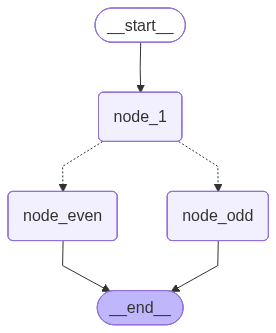

In [5]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build the graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_even", node_even)
builder.add_node("node_odd", node_odd)

# Logic connections
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_parity)
builder.add_edge("node_even", END)
builder.add_edge("node_odd", END)

# Compile the graph
graph = builder.compile()

# Visualize
display(Image(graph.get_graph().draw_mermaid_png()))


In [6]:
graph.invoke({"number": 7, "result": ""})


---Node 1---
---Odd Node---


{'number': 7, 'result': '7 is odd'}

In [7]:
graph.invoke({"number": 4, "result": ""})


---Node 1---
---Even Node---


{'number': 4, 'result': '4 is even'}